# Weekend Movie Recommendation

The main purpose of this project is to present a simple picture of how recommendation systems work in Netflix, Amazon Prime, and YouTube.

# Features

The features of the datasets used in this project are movieId, userId, title, genre, rating, tmbdId, timestamp, tags. We analyse these features, do some analysis on them and present a recommendation system that suggests you some of the movies based on your area of interest.

In simple terms, recommendation systems can be explained as below.
1. User A watches The Mentalist and Pysch.
2. User B watches The Mentalist, then the system suggests Psych from the data collected about user A.

# What is happening at the backend?

The process going on here is simple - the app collects the data of user A. If another person say user B is following user A's pattern, the app will ease the task of user B by suggesting him/her based on the information it has about user A. In simple terms, watching Psych after The Mentalist. So in a nutshell, your app is tracking your interests and making things easy for you.

# Other applications of Recommendation systems

We see recommendation systems in our everyday life - Amazon (Shopping), Gaana (Music), Google Search (Feed), YouTube (Videos), etc.

# 1. Importing the required modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import wordcloud
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

# 2. Reading the necessary csv files

We will load the necessary csv files through pandas and do some exploratory data analysis.

The data sets we are using here are
1. Movies
2. Links
3. Ratings
4. Tags

In [3]:
df_movies = pd.read_csv('../datasets/movies.csv', encoding='utf-8')
df_links = pd.read_csv('../datasets/links.csv', encoding='utf-8')
df_ratings = pd.read_csv('../datasets/ratings.csv', encoding='utf-8')
df_tags = pd.read_csv('../datasets/tags.csv', encoding='utf-8')

# 3. Some knowledge on our data

# a. Movies dataset

In [4]:
#Lets print the top 5 elements in our movies dataset.
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
#Let us know more about our movies dataset by getting much information about it.
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [6]:
#To get the idea of what are all the columns present in our movies dataset.
df_movies.columns

Index(['movieId', 'title', 'genres'], dtype='object')

In [7]:
#To know the number of rows and columns in our movies dataset.
df_movies.shape

(9742, 3)

In [8]:
#Description of our movies dataset.
df_movies.describe()

,movieId
count,9742.000000
mean,42200.353623
std,52160.494854
min,1.000000
25%,3248.250000
50%,7300.000000
75%,76232.000000
max,193609.000000


In [9]:
#To get the number of available rows in our movies dataset.
df_movies.count()

movieId    9742
title      9742
genres     9742
dtype: int64

# b. Links dataset

In [10]:
#Lets print the top 5 elements in our links dataset.
df_links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [11]:
#Let us know more about our links dataset by getting much information about it.
df_links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB


In [12]:
#To get the idea of what are all the columns present in our links dataset.
df_links.columns

Index(['movieId', 'imdbId', 'tmdbId'], dtype='object')

In [13]:
#To know the number of rows and columns in our links dataset.
df_links.shape

(9742, 3)

In [14]:
#Description of our links dataset.
df_links.describe()

,movieId,imdbId,tmdbId
count,9742.000000,9.742000e+03,9734.000000
mean,42200.353623,6.771839e+05,55162.123793
std,52160.494854,1.107228e+06,93653.481487
min,1.000000,4.170000e+02,2.000000
25%,3248.250000,9.518075e+04,9665.500000
50%,7300.000000,1.672605e+05,16529.000000
75%,76232.000000,8.055685e+05,44205.750000
max,193609.000000,8.391976e+06,525662.000000


In [15]:
#To get the number of available rows in our links dataset.
df_links.count()

movieId    9742
imdbId     9742
tmdbId     9734
dtype: int64

# c. Ratings dataset

In [16]:
#Lets print the top 5 elements in our ratings dataset.
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [17]:
#Let us know more about our ratings dataset by getting much information about it.
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [18]:
#To get the idea of what are all the columns present in our ratings dataset.
df_ratings.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [19]:
#To know the number of rows and columns in our ratings dataset.
df_ratings.shape

(100836, 4)

In [20]:
#Description of our ratings dataset.
df_ratings.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [21]:
#To get the number of available rows in our ratings dataset.
df_ratings.count()

userId       100836
movieId      100836
rating       100836
timestamp    100836
dtype: int64

# d. Tags dataset

In [22]:
#Lets print the top 5 elements in our tags dataset.
df_tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [23]:
#Let us know more about our tags dataset by getting much information about it.
df_tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


In [24]:
#To get the idea of what are all the columns present in our tags dataset.
df_tags.columns

Index(['userId', 'movieId', 'tag', 'timestamp'], dtype='object')

In [25]:
#To know the number of rows and columns in our tags dataset.
df_tags.shape

(3683, 4)

In [26]:
#Description of our tags dataset.
df_tags.describe()

,userId,movieId,timestamp
count,3683.000000,3683.000000,3.683000e+03
mean,431.149335,27252.013576,1.320032e+09
std,158.472553,43490.558803,1.721025e+08
min,2.000000,1.000000,1.137179e+09
25%,424.000000,1262.500000,1.137521e+09
50%,474.000000,4454.000000,1.269833e+09
75%,477.000000,39263.000000,1.498457e+09
max,610.000000,193565.000000,1.537099e+09


In [27]:
#To get the number of available rows in our tags dataset.
df_tags.count()

userId       3683
movieId      3683
tag          3683
timestamp    3683
dtype: int64

# 4. Merging datasets to get required fields

In [29]:
#Merging movies, ratings and links datasets to get the title, genre and rating fields. 
#Tags dataset doesn't have much features that are useful in our analysis.
dataset = pd.merge(pd.merge(df_movies, df_ratings),df_links)

In [30]:
#Top 20 rows of the merged dataset
dataset[['title','genres','rating']].sort_values('rating', ascending=False).head(20)

,title,genres,rating
56251,Eraserhead (1977),Drama|Horror,5.0
33888,Chasing Amy (1997),Comedy|Drama|Romance,5.0
20742,My Fair Lady (1964),Comedy|Drama|Musical|Romance,5.0
10168,Forrest Gump (1994),Comedy|Drama|Romance|War,5.0
10169,Forrest Gump (1994),Comedy|Drama|Romance|War,5.0
65379,Gosford Park (2001),Comedy|Drama|Mystery,5.0
10171,Forrest Gump (1994),Comedy|Drama|Romance|War,5.0
20739,My Fair Lady (1964),Comedy|Drama|Musical|Romance,5.0
10173,Forrest Gump (1994),Comedy|Drama|Romance|War,5.0
10174,Forrest Gump (1994),Comedy|Drama|Romance|War,5.0


# 5. Data Exploration

# a. Exploring Genre feature

Genre is one of the most important features to watch for. We categorize the audience based on genres. I am an Action movie lover. Likewise, there will be different tastes for people who like Sci-Fi, Fantasy, Drama, Romance, Thrillers. So the genres play an important roles in analysing the recommendation engines.

Lets see the count of the movies in their respective genres.

<AxesSubplot:>

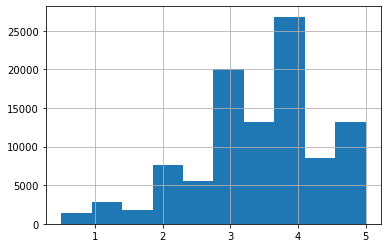

In [31]:
df_ratings['rating'].hist()

rating    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

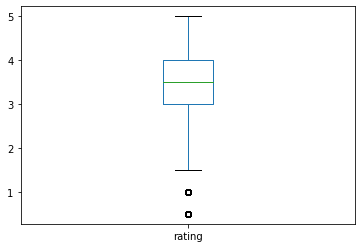

In [32]:
df_ratings['rating'].plot(kind='box', subplots=True)

In [33]:
userRatingsAggr = df_ratings.groupby(['userId']).agg({'rating': [np.size, np.mean]})
userRatingsAggr.reset_index(inplace=True)  # To reset multilevel (pivot-like) index
# userRatingsAggr.head()

In [34]:
userRatingsAggr['rating'].describe()

,size,mean
count,610.000000,610.000000
mean,165.304918,3.657222
std,269.480584,0.480635
min,20.000000,1.275000
25%,35.000000,3.360000
50%,70.500000,3.694385
75%,168.000000,3.997500
max,2698.000000,5.000000


size       AxesSubplot(0.125,0.125;0.352273x0.755)
mean    AxesSubplot(0.547727,0.125;0.352273x0.755)
dtype: object

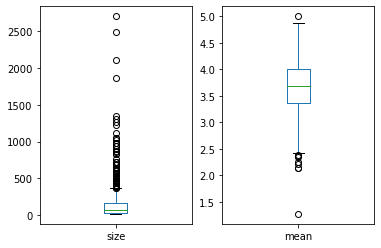

In [35]:
userRatingsAggr['rating'].plot(kind='box', subplots=True)

In [36]:
movieRatingsAggr = df_ratings.groupby(['movieId']).agg({'rating': [np.size, np.mean]})
movieRatingsAggr.reset_index(inplace=True)
# movieRatingsAggr.head()

In [37]:
movieRatingsAggr['rating'].describe()

,size,mean
count,9724.000000,9724.000000
mean,10.369807,3.262448
std,22.401005,0.869874
min,1.000000,0.500000
25%,1.000000,2.800000
50%,3.000000,3.416667
75%,9.000000,3.911765
max,329.000000,5.000000


size       AxesSubplot(0.125,0.125;0.352273x0.755)
mean    AxesSubplot(0.547727,0.125;0.352273x0.755)
dtype: object

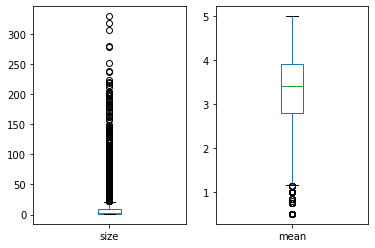

In [38]:
movieRatingsAggr['rating'].plot(kind='box', subplots=True)

<AxesSubplot:xlabel='rating'>

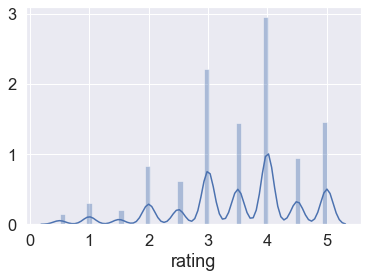

In [40]:
# Import seaborn library
import seaborn as sns
sns.set_style('whitegrid')
sns.set(font_scale=1.5)
%matplotlib inline

# Display distribution of rating
sns.distplot(df_ratings['rating'].fillna(df_ratings['rating'].median()))

In [41]:
# Make a census of the genre keywords
genre_labels = set()
for s in df_movies['genres'].str.split('|').values:
    genre_labels = genre_labels.union(set(s))

# Function that counts the number of times each of the genre keywords appear
def count_word(dataset, ref_col, census):
    keyword_count = dict()
    for s in census: 
        keyword_count[s] = 0
    for census_keywords in dataset[ref_col].str.split('|'):        
        if type(census_keywords) == float and pd.isnull(census_keywords): 
            continue        
        for s in [s for s in census_keywords if s in census]: 
            if pd.notnull(s): 
                keyword_count[s] += 1
    #______________________________________________________________________
    # convert the dictionary in a list to sort the keywords by frequency
    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count

# Calling this function gives access to a list of genre keywords which are sorted by decreasing frequency
keyword_occurences, dum = count_word(df_movies, 'genres', genre_labels)
keyword_occurences[:5]

[['Drama', 4361],
 ['Comedy', 3756],
 ['Thriller', 1894],
 ['Action', 1828],
 ['Romance', 1596]]

# 6. Designing Content based Recommendation System

# Explanation

Content based recommendation is one of the types of recommendation systems. The basic idea behind this system is - when you like a particular item, there are plenty of chances that you might like similar items. For example, if you like the movie "John Wick", then there are high percentage of chances that you like movies similar to John Wick like - Equiliser, John Wick 2, so on.

The accuracy of the system increases when the system tracks more and more about the user actions. In simple terms, watch Mission Impossible series, the system will recommend you to watch Jason Bourne, American Assasin, Jack Ryan.

In [42]:
# Break up the big genre string into a string array
df_movies['genres'] = df_movies['genres'].str.split('|')
# Convert genres to string value
df_movies['genres'] = df_movies['genres'].fillna("").astype('str')

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(df_movies['genres'])
tfidf_matrix.shape

(9742, 177)

# c. Cosine Implementation

Cosine similarity is a metric used to measure how similar the documents are irrespective of their size. Mathematically, it measures the cosine of the angle between two vectors projected in a multi-dimensional space. The cosine similarity is advantageous because even if the two similar documents are far apart by the Euclidean distance (due to the size of the document), chances are they may still be oriented closer together. The smaller the angle, higher the cosine similarity.

# In a nutshell

In a nutshell we are finding the similarities between the movies. How can there be a similarity? Based on genre, rating by the user for that genre. Based on these we find the distance between the movies. If the distance is less, then the movie is of similar type and can go for recommendation.

In [45]:
from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sim[:4, :4]

array([[1.        , 0.31379419, 0.0611029 , 0.05271111],
       [0.31379419, 1.        , 0.        , 0.        ],
       [0.0611029 , 0.        , 1.        , 0.35172407],
       [0.05271111, 0.        , 0.35172407, 1.        ]])

# A quick notes about linear_kernal

Linear Kernel is used when the data is Linearly separable, that is, it can be separated using a single Line. It is one of the most common kernels to be used. It is mostly used when there are a Large number of Features in a particular Data Set. One of the examples where there are a lot of features, is Text Classification, as each alphabet is a new feature. So we mostly use Linear Kernel in Text Classification.

In [46]:
# Build a 1-dimensional array with movie titles
titles = df_movies['title']
indices = pd.Series(df_movies.index, index=df_movies['title'])

# Function that get movie recommendations based on the cosine similarity score of movie genres
def genre_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:21]
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices]

# Explanation of above code

What we are doing in the above piece of code is simple. We made a series of movies list and assigned it to indices.

Now in the genre_recommendations function, we are passing the title or the movie name. We are getting the index of that moovie from the series. Then we are calculating the cosine similarity of that movie, ie the distance of the current movie with the remaining movies. We will get a similarity score which is sim_score here. We are sorting the scores into order and picking up the top 20 movies that are close our current movie and returning the list.

# 7. Testing

In [47]:
genre_recommendations('Good Will Hunting (1997)').head(20)

24                            Leaving Las Vegas (1995)
27                                   Persuasion (1995)
42                How to Make an American Quilt (1995)
45                        When Night Is Falling (1995)
66                                 Bed of Roses (1996)
75     Once Upon a Time... When We Were Colored (1995)
76                           Angels and Insects (1995)
93               Bridges of Madison County, The (1995)
115                       Up Close and Personal (1996)
151                                    Mad Love (1995)
162                         Scarlet Letter, The (1995)
170                               Total Eclipse (1995)
175                       Walk in the Clouds, A (1995)
183                              Before Sunrise (1995)
189                           Circle of Friends (1995)
213                            Immortal Beloved (1994)
232                                 Love Affair (1994)
261                  Picture Bride (Bijo photo) (1994)
262       

# Explanation of Good Will Hunting (1997)

The movie title is "Good Will Hunting (1997)" was passed to the genre_recommendations function and then the cosine similarity was performed with Good Will Hunting (1997) to all the movies. The values are sorted in order and the top 21 values will have corresponding movie titles associated with them. The return statement will return those values.

In [48]:
genre_recommendations('Toy Story (1995)').head(20)

1706                                          Antz (1998)
2355                                   Toy Story 2 (1999)
2809       Adventures of Rocky and Bullwinkle, The (2000)
3000                     Emperor's New Groove, The (2000)
3568                                Monsters, Inc. (2001)
6194                                     Wild, The (2006)
6486                               Shrek the Third (2007)
6948                       Tale of Despereaux, The (2008)
7760    Asterix and the Vikings (Astérix et les Viking...
8219                                         Turbo (2013)
8927                             The Good Dinosaur (2015)
9430                                         Moana (2016)
5490    Twelve Tasks of Asterix, The (Les douze travau...
6448           TMNT (Teenage Mutant Ninja Turtles) (2007)
8357                                The Lego Movie (2014)
3194                                         Shrek (2001)
7530                               Gnomeo & Juliet (2011)
7805        Pu

# Clustering

The goal of this project is to find out similarities within groups of people in order to build a movie recommending system for users. We are going to analyze a dataset from Netflix database to explore the characteristics that people share in movies’ taste, based on how they rate them.

In [49]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
from sklearn.metrics import silhouette_samples, silhouette_score
from matplotlib import cm
%matplotlib inline

In [50]:
# Import the Movies dataset
movies = pd.read_csv('../datasets/movies.csv', encoding='utf-8')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [51]:
# Import the ratings dataset
ratings = pd.read_csv('../datasets/ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [52]:
# Print the number of records and the total number of movies
print('The dataset contains: ', len(ratings), ' ratings of ', len(movies), ' movies.')

The dataset contains:  100836  ratings of  9742  movies.


We are now going to define a function get_genre_ratings which gives the ratings to the genres we have chosen.

In [53]:
# Function to get the genre ratings
def get_genre_ratings(ratings, movies, genres, column_names):
    genre_ratings = pd.DataFrame()
    for genre in genres:        
        genre_movies = movies[movies['genres'].str.contains(genre) ]
        avg_genre_votes_per_user = ratings[ratings['movieId'].isin(genre_movies['movieId'])].loc[:, ['userId', 'rating']].groupby(['userId'])['rating'].mean().round(2)
        
        genre_ratings = pd.concat([genre_ratings, avg_genre_votes_per_user], axis=1)
        
    genre_ratings.columns = column_names
    return genre_ratings
# Calculate the average rating of romance and scifi movies
genre_ratings = get_genre_ratings(ratings, movies, ['Romance', 'Sci-Fi'], ['avg_romance_rating', 'avg_scifi_rating'])
genre_ratings.head()

,avg_romance_rating,avg_scifi_rating
1,4.31,4.22
2,4.50,3.88
3,0.50,4.20
4,3.38,2.83
5,3.09,2.50


In [54]:
# Function to get the biased dataset
def bias_genre_rating_dataset(genre_ratings, score_limit_1, score_limit_2):
    biased_dataset =    genre_ratings[((genre_ratings['avg_romance_rating'] < score_limit_1 - 0.2) & (genre_ratings['avg_scifi_rating'] > score_limit_2)) | ((genre_ratings['avg_scifi_rating'] < score_limit_1) & (genre_ratings['avg_romance_rating'] > score_limit_2))]
    biased_dataset = pd.concat([biased_dataset[:300], genre_ratings[:2]])
    biased_dataset = pd.DataFrame(biased_dataset.to_records())
    return biased_dataset
# Bias the dataset
biased_dataset = bias_genre_rating_dataset(genre_ratings, 3.2, 2.5)
# Printing the resulting number of records & the head of the dataset
print( "Number of records: ", len(biased_dataset))
biased_dataset.head()

Number of records:  162


,index,avg_romance_rating,avg_scifi_rating
0,3,0.50,4.20
1,4,3.38,2.83
2,5,3.09,2.50
3,7,2.65,3.15
4,9,3.17,3.00


Now, we will make some Visualization Analysis in order to obtain a good overview of the biased dataset and its characteristics.

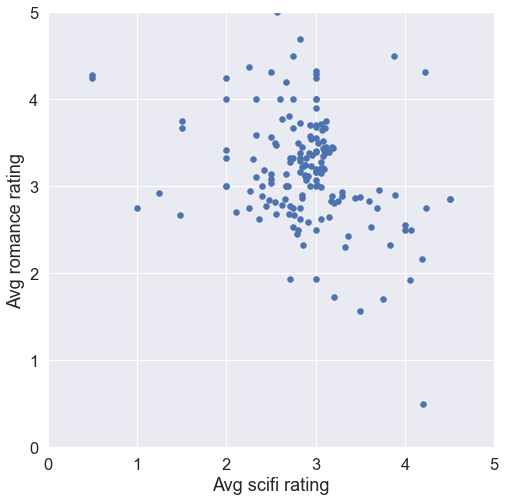

In [55]:
# Defining the scatterplot drawing function
def draw_scatterplot(x_data, x_label, y_data, y_label):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    plt.xlim(0, 5)
    plt.ylim(0, 5)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.scatter(x_data, y_data, s=30)
# Plot the scatterplot
draw_scatterplot(biased_dataset['avg_scifi_rating'],'Avg scifi rating', biased_dataset['avg_romance_rating'], 'Avg romance rating')

# Choosing k value

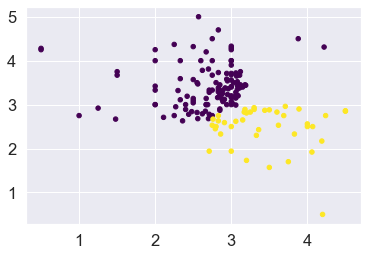

In [56]:
# Let's turn our dataset into a list
X = biased_dataset[['avg_scifi_rating','avg_romance_rating']].values
# Import KMeans
from sklearn.cluster import KMeans
# Create an instance of KMeans to find two clusters
kmeans_1 = KMeans(n_clusters=2)
# Use fit_predict to cluster the dataset
predictions = kmeans_1.fit_predict(X)
# Defining the cluster plotting function
def draw_clusters(biased_dataset, predictions, cmap='viridis'):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    plt.xlim(0, 5)
    plt.ylim(0, 5)
    ax.set_xlabel('Avg scifi rating')
    ax.set_ylabel('Avg romance rating')
clustered = pd.concat([biased_dataset.reset_index(), pd.DataFrame({'group':predictions})], axis=1)
plt.scatter(clustered['avg_scifi_rating'], clustered['avg_romance_rating'], c=clustered['group'], s=20, cmap=cm.get_cmap('viridis'))

c:\users\vemulapalli likitha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: ConvergenceWarning: Number of distinct clusters (157) found smaller than n_clusters (162). Possibly due to duplicate points in X.
  


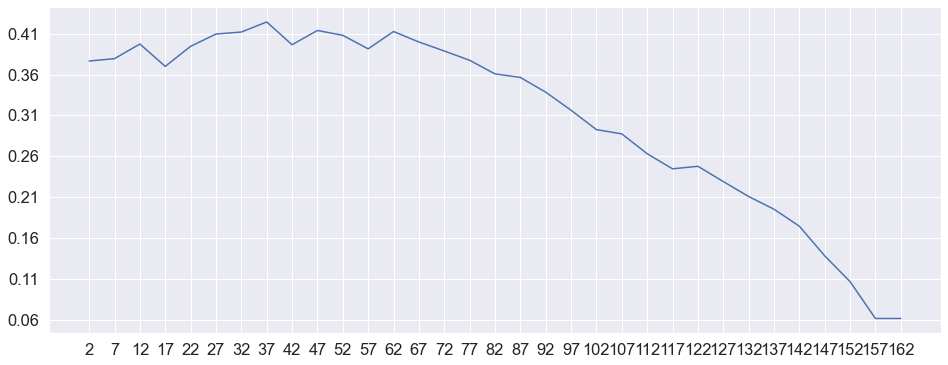

In [57]:
# Selecting our dataset to study
df = biased_dataset[['avg_scifi_rating','avg_romance_rating']]
possible_k_values = range(2, len(X)+1, 5)
# Define function to calculate the clustering errors
def clustering_errors(k, data):
    kmeans = KMeans(n_clusters=k).fit(data)
    predictions = kmeans.predict(data)
    silhouette_avg = silhouette_score(data, predictions)
    return silhouette_avg
# Calculate error values for all k values we're interested in
errors_per_k = [clustering_errors(k, X) for k in possible_k_values]
# Plot the each value of K vs. the silhouette score at that value
fig, ax = plt.subplots(figsize=(16, 6))
plt.plot(possible_k_values, errors_per_k)
# Ticks and grid
xticks = np.arange(min(possible_k_values), max(possible_k_values)+1, 5.0)
ax.set_xticks(xticks, minor=False)
ax.set_xticks(xticks, minor=True)
ax.xaxis.grid(True, which='both')
yticks = np.arange(round(min(errors_per_k), 2), max(errors_per_k), .05)
ax.set_yticks(yticks, minor=False)
ax.set_yticks(yticks, minor=True)
ax.yaxis.grid(True, which='both')

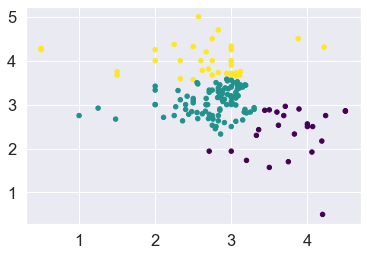

In [58]:
# Let's turn our dataset into a list
X = biased_dataset[['avg_scifi_rating','avg_romance_rating']].values
# Import KMeans
from sklearn.cluster import KMeans
import matplotlib.cm as cm
# Create an instance of KMeans to find two clusters
kmeans_1 = KMeans(n_clusters=3)
# Use fit_predict to cluster the dataset
predictions = kmeans_1.fit_predict(X)
# Defining the cluster plotting function
def draw_clusters(biased_dataset, predictions):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    plt.xlim(0, 5)
    plt.ylim(0, 5)
    ax.set_xlabel('Avg scifi rating')
    ax.set_ylabel('Avg romance rating')
clustered = pd.concat([biased_dataset.reset_index(), pd.DataFrame({'group':predictions})], axis=1)
plt.scatter(clustered['avg_scifi_rating'], clustered['avg_romance_rating'], c=clustered['group'], s=20, cmap=cm.get_cmap('viridis'))

We choose the k value as 5

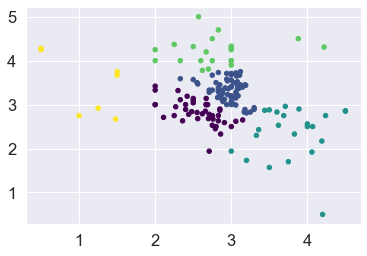

In [59]:
# Let's turn our dataset into a list
X = biased_dataset[['avg_scifi_rating','avg_romance_rating']].values
# Import KMeans
from sklearn.cluster import KMeans
import matplotlib.cm as cm
# Create an instance of KMeans to find two clusters
kmeans_1 = KMeans(n_clusters=5)
# Use fit_predict to cluster the dataset
predictions = kmeans_1.fit_predict(X)
# Defining the cluster plotting function
def draw_clusters(biased_dataset, predictions):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    plt.xlim(0, 5)
    plt.ylim(0, 5)
    ax.set_xlabel('Avg scifi rating')
    ax.set_ylabel('Avg romance rating')
clustered = pd.concat([biased_dataset.reset_index(), pd.DataFrame({'group':predictions})], axis=1)
plt.scatter(clustered['avg_scifi_rating'], clustered['avg_romance_rating'], c=clustered['group'], s=20, cmap=cm.get_cmap('viridis'))

The obvious choice for k is 7 from the graph.

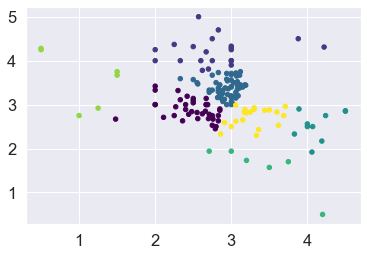

In [60]:
# Let's turn our dataset into a list
X = biased_dataset[['avg_scifi_rating','avg_romance_rating']].values
# Import KMeans
from sklearn.cluster import KMeans
import matplotlib.cm as cm
# Create an instance of KMeans to find two clusters
kmeans_1 = KMeans(n_clusters=7)
# Use fit_predict to cluster the dataset
predictions = kmeans_1.fit_predict(X)
# Defining the cluster plotting function
def draw_clusters(biased_dataset, predictions):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    plt.xlim(0, 5)
    plt.ylim(0, 5)
    ax.set_xlabel('Avg scifi rating')
    ax.set_ylabel('Avg romance rating')
clustered = pd.concat([biased_dataset.reset_index(), pd.DataFrame({'group':predictions})], axis=1)
plt.scatter(clustered['avg_scifi_rating'], clustered['avg_romance_rating'], c=clustered['group'], s=20, cmap=cm.get_cmap('viridis'))

# 8. Conclusion

We obviously cannot conclude that the Content based recommendation system as the best system as we have not explored the collaborative recommendation system. There are certain cons in the content based recommendation system.

1. The system is restricted to the data that is available in the given dataset and making recommendations.
2. We are not certain about its recommendation capability if the movies outside this dataset are given. We still need to do some further analysis.

Further analysis on Collaborative recommendation systems might give further useful insights.